 # Correlation function for feedback dynamics

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import cmath
import statsmodels.api as sm
import scipy as sp
import os
from scipy.signal import find_peaks
%run Functions.ipynb

In [347]:
dt = 0.01
times = np.arange(0, 300, dt)

In [348]:
chi = 0.1
omega = 0.3
T = 10.
mu = 0.1
zin = 1/np.sqrt(2)
yin = 1/np.sqrt(2)
B = 2*omega+2*T*mu+2*chi*mu
delta = 4*B**2-chi**4/4

In [349]:
alpha = 2*mu**2+1/4*chi**2
Cost1 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)+zin
Cost2 = 1/np.sqrt(delta)*(1/2*chi**2*zin+2*B*yin+2*mu*chi*B*(4*mu**2+1/4*chi**2)/(B**2+mu**2*chi**2+4*mu**4))
Cost3 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)

In [350]:
z = np.exp(-alpha*times)*(Cost1*np.cos(1/2*np.sqrt(delta)*times)+Cost2*np.sin(1/2*np.sqrt(delta)*times))-Cost3
z2t = np.exp(-alpha*2*times)*(Cost1*np.cos(1/2*np.sqrt(delta)*2*times)+Cost2*np.sin(1/2*np.sqrt(delta)*2*times))-Cost3

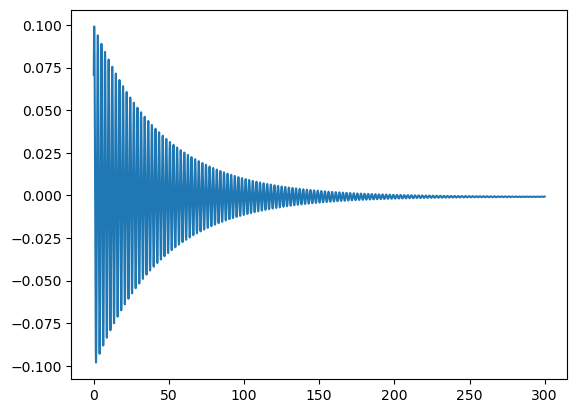

In [351]:
plt.plot(times,chi*z)

In [352]:
newyin=-2*zin*mu-yin*zin*chi
newzin = 2*yin*mu+(1-zin**2)*chi
newCost1 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)+newzin 
newCost2 = 1/np.sqrt(delta)*(1/2*chi**2*newzin+2*B*newyin+2*mu*chi*B*(4*mu**2+1/4*chi**2)/(B**2+mu**2*chi**2+4*mu**4))

In [353]:
znew = np.exp(-alpha*times)*(newCost1*np.cos(1/2*np.sqrt(delta)*times)+newCost2*np.sin(1/2*np.sqrt(delta)*times))-Cost3
znew2t = np.exp(-alpha*2*times)*(newCost1*np.cos(1/2*np.sqrt(delta)*2*times)+newCost2*np.sin(1/2*np.sqrt(delta)*2*times))-Cost3

In [354]:
FeedCorr = chi**2*z*zin+chi*znew
FeedCorr2t = chi**2*z2t*zin+chi*znew2t
LeggettGarg = 2*FeedCorr-FeedCorr2t

Text(0, 0.5, 'Value')

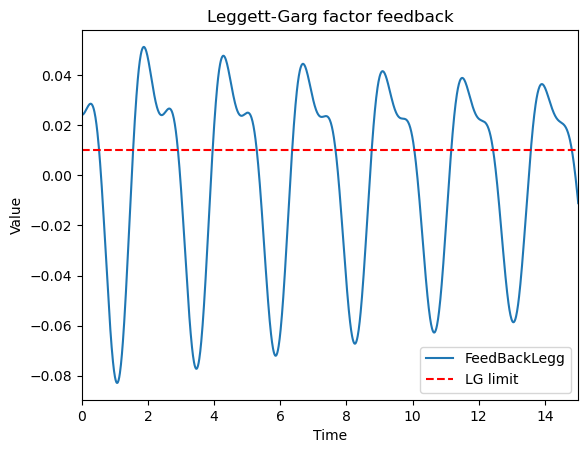

In [355]:
fig, ax = plt.subplots()
ax.plot(times[:len(LeggettGarg)], LeggettGarg, label='FeedBackLegg')
ax.axhline(y=0.01, color='red', linestyle='--', label='LG limit')
ax.legend()
ax.set_xlim(0,15)
ax.set_title('Leggett-Garg factor feedback')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

In [334]:
gamma = chi**2/2
Tilde_om = 2*np.sqrt(omega**2 - gamma**2/16)
K_t = 2*gamma*np.e**(-gamma/2*times)*(np.cos(Tilde_om*times) + gamma/(2*Tilde_om)*np.sin(Tilde_om*times))
K_2t = 2*gamma*np.e**(-gamma/2*2*times)*(np.cos(Tilde_om*2*times) + gamma/(2*Tilde_om)*np.sin(Tilde_om*2*times))
L = 2*K_t - K_2t

Text(0, 0.5, 'Value')

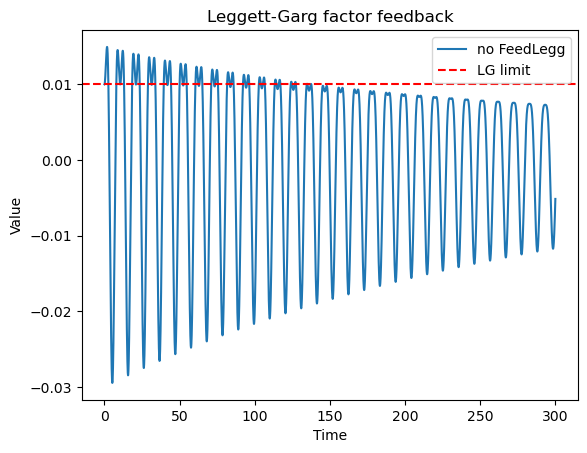

In [335]:
fig, ax = plt.subplots()
ax.plot(times[:len(L)], L, label='no FeedLegg')
ax.axhline(y=0.01, color='red', linestyle='--', label='LG limit')
ax.legend()

ax.set_title('Leggett-Garg factor feedback')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

## Find peaks

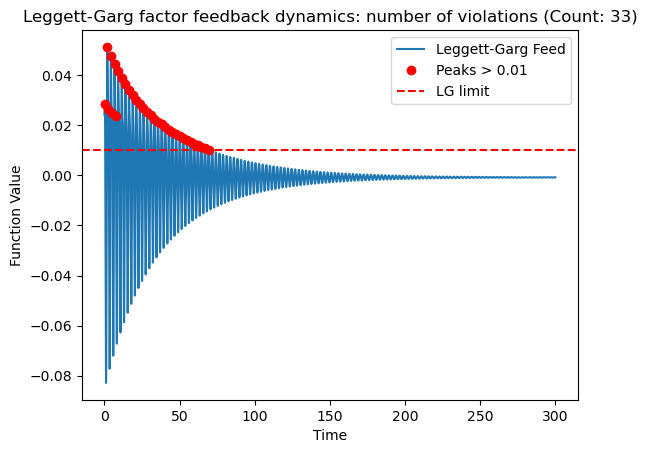

In [336]:
peaks, properties = find_peaks(LeggettGarg, height=0.01)
peak_heights = properties['peak_heights']
num_filtered_peaks = len(peaks)
plt.plot(times, LeggettGarg, label='Leggett-Garg Feed')
plt.plot(times[peaks], LeggettGarg[peaks], 'ro', label='Peaks > 0.01')
plt.axhline(y=0.01, color='red', linestyle='--', label='LG limit')
plt.xlabel('Time')
plt.ylabel('Function Value')
plt.title(f'Leggett-Garg factor feedback dynamics: number of violations (Count: {num_filtered_peaks})')
plt.legend()
plt.show()

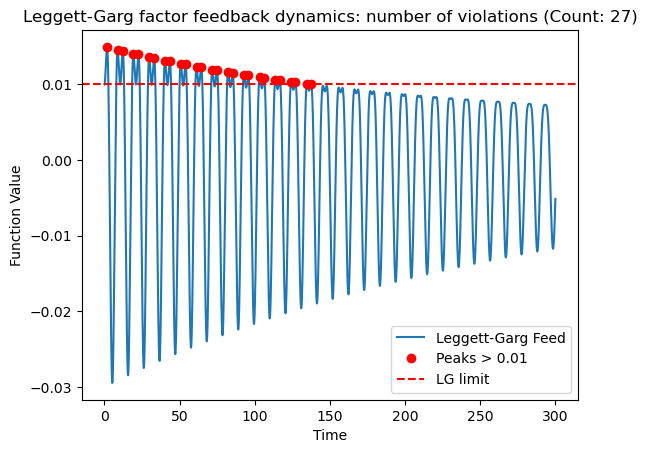

In [337]:
peaks, properties = find_peaks(L, height=0.01)
peak_heights = properties['peak_heights']
num_filtered_peaks = len(peaks)
plt.plot(times, L, label='Leggett-Garg Feed')
plt.plot(times[peaks], L[peaks], 'ro', label='Peaks > 0.01')
plt.axhline(y=0.01, color='red', linestyle='--', label='LG limit')
plt.xlabel('Time')
plt.ylabel('Function Value')
plt.title(f'Leggett-Garg factor feedback dynamics: number of violations (Count: {num_filtered_peaks})')
plt.legend()
plt.show()

## Optimal feedback

In [338]:
muvalues = np.linspace(0, 0.5,500)

In [339]:
Leggs = []
for mu in muvalues:
    chi = 0.1
    omega = 0.3
    T = 10.
    zin = 1/np.sqrt(2)
    yin = 1/np.sqrt(2)
    B = 2*omega+2*T*mu+2*chi*mu
    delta = 4*B**2-chi**4/4

    alpha = 2*mu**2+1/4*chi**2
    Cost1 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)+zin
    Cost2 = 1/np.sqrt(delta)*(1/2*chi**2*zin+2*B*yin+2*mu*chi*B*(4*mu**2+1/4*chi**2)/(B**2+mu**2*chi**2+4*mu**4))
    Cost3 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)

    z = np.exp(-alpha*times)*(Cost1*np.cos(1/2*np.sqrt(delta)*times)+Cost2*np.sin(1/2*np.sqrt(delta)*times))-Cost3
    z2t = np.exp(-alpha*2*times)*(Cost1*np.cos(1/2*np.sqrt(delta)*2*times)+Cost2*np.sin(1/2*np.sqrt(delta)*2*times))-Cost3

    newyin=-2*zin*mu-yin*zin*chi
    newzin = 2*yin*mu+(1-zin**2)*chi
    newCost1 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)+newzin 
    newCost2 = 1/np.sqrt(delta)*(1/2*chi**2*newzin+2*B*newyin+2*mu*chi*B*(4*mu**2+1/4*chi**2)/(B**2+mu**2*chi**2+4*mu**4))

    znew = np.exp(-alpha*times)*(newCost1*np.cos(1/2*np.sqrt(delta)*times)+newCost2*np.sin(1/2*np.sqrt(delta)*times))-Cost3
    znew2t = np.exp(-alpha*2*times)*(newCost1*np.cos(1/2*np.sqrt(delta)*2*times)+newCost2*np.sin(1/2*np.sqrt(delta)*2*times))-Cost3

    FeedCorr = chi**2*z*zin+chi*znew
    FeedCorr2t = chi**2*z2t*zin+chi*znew2t
    LeggettGarg = 2*FeedCorr-FeedCorr2t
    Leggs.append(LeggettGarg)

In [340]:
Num_peaks = []
for L in Leggs:
    peaks, properties = find_peaks(L, height=0.01)
    N = len(peaks)
    Num_peaks.append(N)

In [341]:
max_value = np.max(Num_peaks)
max_indices = [i for i, x in enumerate(Num_peaks) if x == max_value]

In [342]:
Num_peaks

[27,
 28,
 30,
 33,
 35,
 36,
 39,
 41,
 42,
 44,
 46,
 49,
 50,
 51,
 52,
 52,
 53,
 53,
 53,
 54,
 55,
 54,
 55,
 54,
 55,
 55,
 55,
 55,
 54,
 54,
 55,
 54,
 54,
 54,
 53,
 53,
 53,
 52,
 52,
 52,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 49,
 48,
 48,
 48,
 48,
 47,
 47,
 46,
 46,
 46,
 45,
 45,
 44,
 44,
 44,
 44,
 43,
 42,
 42,
 42,
 42,
 42,
 41,
 41,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,


In [343]:
max_indices

[20, 22, 24, 25, 26, 27, 30]

In [344]:
mu_best = muvalues[max_indices[0]]

In [345]:
Leggs[max_indices[0]]

array([0.0128341 , 0.01283543, 0.01283942, ..., 0.00778707, 0.00777822,
       0.00776911])

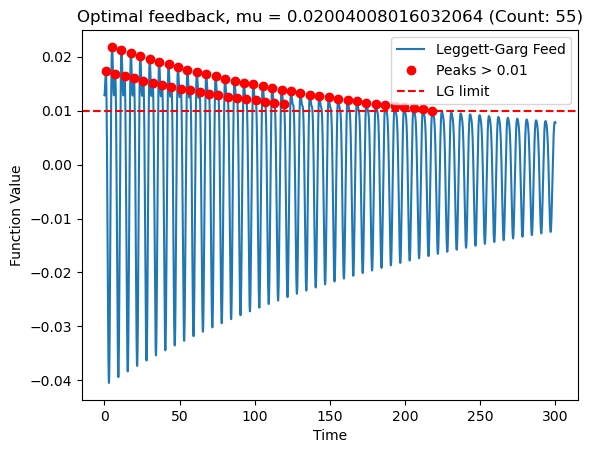

In [346]:
peaks, properties = find_peaks(Leggs[max_indices[0]], height=0.01)
peak_heights = properties['peak_heights']
num_filtered_peaks = len(peaks)
plt.plot(times, Leggs[max_indices[0]], label='Leggett-Garg Feed')
plt.plot(times[peaks], Leggs[max_indices[0]][peaks], 'ro', label='Peaks > 0.01')
plt.axhline(y=0.01, color='red', linestyle='--', label='LG limit')
plt.xlabel('Time')
plt.ylabel('Function Value')
plt.title(f'Optimal feedback, mu = {mu_best} (Count: {num_filtered_peaks})')
plt.legend()
plt.show()

## Total violation time

In [239]:
violation_time = np.sum(LeggettGarg > 0.01) * dt
print('The total violation time is',violation_time)

The total violation time is 2.5100000000000002


In [240]:
vio_times = LeggettGarg > 0.01

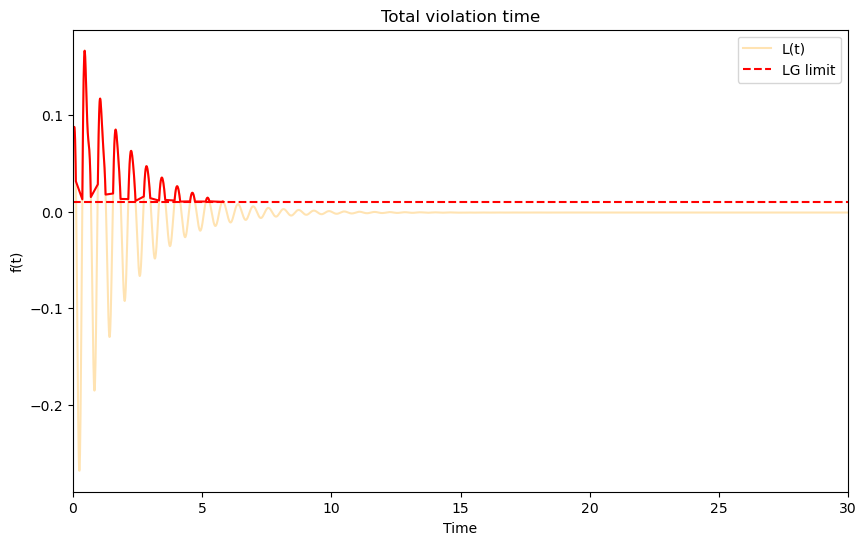

In [241]:
plt.figure(figsize=(10, 6))
plt.plot(times, LeggettGarg, label='L(t)', color='orange', alpha = 0.3)
plt.plot(times[vio_times], LeggettGarg[vio_times], color='red')
plt.axhline(y=0.01, color='red', linestyle='--', label='LG limit')
plt.xlim(0,30)
# Customize plot
plt.xlabel('Time')
plt.ylabel('f(t)')
plt.title('Total violation time')
plt.legend()


## Optimal feedback for time violation

In [242]:
muvalues = np.linspace(0, 0.5,500)

In [243]:
Leggs = []
for mu in muvalues:
    chi = 0.1
    omega = 0.3
    T = 10.
    zin = 1/np.sqrt(2)
    yin = 1/np.sqrt(2)
    B = 2*omega+2*T*mu+2*chi*mu
    delta = 4*B**2-chi**4/4

    alpha = 2*mu**2+1/4*chi**2
    Cost1 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)+zin
    Cost2 = 1/np.sqrt(delta)*(1/2*chi**2*zin+2*B*yin+2*mu*chi*B*(4*mu**2+1/4*chi**2)/(B**2+mu**2*chi**2+4*mu**4))
    Cost3 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)

    z = np.exp(-alpha*times)*(Cost1*np.cos(1/2*np.sqrt(delta)*times)+Cost2*np.sin(1/2*np.sqrt(delta)*times))-Cost3
    z2t = np.exp(-alpha*2*times)*(Cost1*np.cos(1/2*np.sqrt(delta)*2*times)+Cost2*np.sin(1/2*np.sqrt(delta)*2*times))-Cost3

    newyin=-2*zin*mu-yin*zin*chi
    newzin = 2*yin*mu+(1-zin**2)*chi
    newCost1 = 2*mu*chi*B/(B**2+mu**2*chi**2+4*mu**4)+newzin 
    newCost2 = 1/np.sqrt(delta)*(1/2*chi**2*newzin+2*B*newyin+2*mu*chi*B*(4*mu**2+1/4*chi**2)/(B**2+mu**2*chi**2+4*mu**4))

    znew = np.exp(-alpha*times)*(newCost1*np.cos(1/2*np.sqrt(delta)*times)+newCost2*np.sin(1/2*np.sqrt(delta)*times))-Cost3
    znew2t = np.exp(-alpha*2*times)*(newCost1*np.cos(1/2*np.sqrt(delta)*2*times)+newCost2*np.sin(1/2*np.sqrt(delta)*2*times))-Cost3

    FeedCorr = chi**2*z*zin+chi*znew
    FeedCorr2t = chi**2*z2t*zin+chi*znew2t
    LeggettGarg = 2*FeedCorr-FeedCorr2t
    Leggs.append(LeggettGarg)

In [244]:
violTimes = []
for L in Leggs:
    violTimes.append(np.sum(L > 0.01) * dt)

In [245]:
maxval = max(violTimes)
max_indices = [i for i, x in enumerate(Num_peaks) if x == max_value]
mu_best = muvalues[max_indices[0]]
violation_times_best = Leggs[max_indices[0]]>0.01

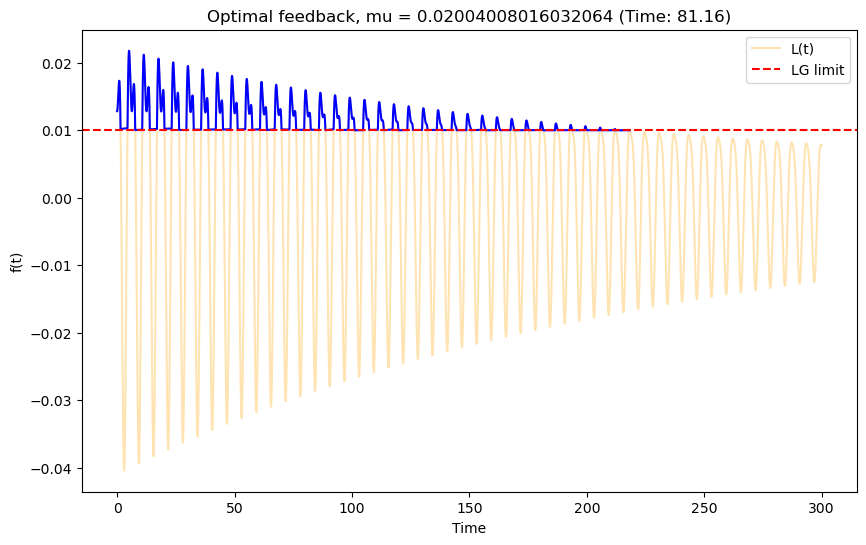

In [246]:
plt.figure(figsize=(10, 6))
plt.plot(times, Leggs[max_indices[0]], label='L(t)', color='orange', alpha = 0.3)
plt.plot(times[violation_times_best], Leggs[max_indices[0]][violation_times_best], color='blue')
plt.axhline(y=0.01, color='red', linestyle='--', label='LG limit')
#plt.xlim(0,30)
# Customize plot
plt.xlabel('Time')
plt.ylabel('f(t)')
plt.title(f'Optimal feedback, mu = {mu_best} (Time: {maxval})')
plt.legend()